In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle


In [ ]:
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d chandrashekarnatesh/poultry-diseases

Dataset URL: https://www.kaggle.com/datasets/chandrashekarnatesh/poultry-diseases
License(s): MIT
100% 12.6G/12.6G [01:59<00:00, 234MB/s]
100% 12.6G/12.6G [01:59<00:00, 113MB/s]


In [ ]:
!unzip poultry-diseases


Streaming output truncated to the last 5000 lines.
  inflating: data/data/val/Salmonella/salmo.1854.jpg_aug27.JPG  
  inflating: data/data/val/Salmonella/salmo.1854.jpg_aug3.JPG  
  inflating: data/data/val/Salmonella/salmo.1855.jpg_aug15.JPG  
  inflating: data/data/val/Salmonella/salmo.1855.jpg_aug27.JPG  
  inflating: data/data/val/Salmonella/salmo.1855.jpg_aug29.JPG  
  inflating: data/data/val/Salmonella/salmo.1855.jpg_aug45.JPG  
  inflating: data/data/val/Salmonella/salmo.1856.jpg_aug11.JPG  
  inflating: data/data/val/Salmonella/salmo.1856.jpg_aug12.JPG  
  inflating: data/data/val/Salmonella/salmo.1856.jpg_aug14.JPG  
  inflating: data/data/val/Salmonella/salmo.1856.jpg_aug18.JPG  
  inflating: data/data/val/Salmonella/salmo.1856.jpg_aug20.JPG  
  inflating: data/data/val/Salmonella/salmo.1856.jpg_aug46.JPG  
  inflating: data/data/val/Salmonella/salmo.1857.jpg_aug11.JPG  
  inflating: data/data/val/Salmonella/salmo.1857.jpg_aug14.JPG  
  inflating: data/data/val/Salmonella/sa

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2

import pandas as pd

In [ ]:
IMAGE_SIZE = (224, 224,3)


In [ ]:
train_data= "/content/data/data/train"
val_data = "/content/data/data/val"
test_data= "/content/data/data/test"

In [ ]:
labels = os.listdir(train_data)

In [ ]:
labels

['Salmonella', 'New Castle Disease', 'Coccidiosis', 'Healthy']

In [ ]:
def read_data(folder):
    data, label, paths = [], [], []
    for l in labels:
        path = f"{folder}/{l}/"
        folder_data = os.listdir(path)[:500]
        for image_path in folder_data:
            img = cv2.imread(path + image_path)
            data.append(img)
            label.append(l)
            paths.append(os.path.join(folder, l, image_path))

    return data, label, paths

In [ ]:
all_data, all_labels, all_paths = read_data(train_data)

In [ ]:
train_df = pd.DataFrame({
    'image':all_data,
    'path': all_paths,
    'label': all_labels
})

In [ ]:
train_df

,image,path,label
0,"[[[184, 206, 204], [181, 203, 201], [153, 177,...",/content/data/data/train/Salmonella/salmo.643....,Salmonella
1,"[[[0, 0, 1], [161, 163, 164], [151, 156, 155],...",/content/data/data/train/Salmonella/pcrsalmo.1...,Salmonella
2,"[[[26, 19, 24], [48, 42, 47], [22, 19, 28], [2...",/content/data/data/train/Salmonella/salmo.1154...,Salmonella
3,"[[[138, 162, 182], [142, 166, 186], [145, 166,...",/content/data/data/train/Salmonella/salmo.336....,Salmonella
4,"[[[97, 80, 61], [111, 97, 79], [115, 103, 91],...",/content/data/data/train/Salmonella/salmo.1327...,Salmonella
...,...,...,...
1995,"[[[71, 71, 71], [71, 71, 71], [71, 71, 71], [7...",/content/data/data/train/Healthy/healthy.1509....,Healthy
1996,"[[[115, 118, 102], [2, 9, 0], [3, 12, 9], [108...",/content/data/data/train/Healthy/healthy.692.j...,Healthy
1997,"[[[71, 85, 103], [92, 105, 121], [27, 33, 44],...",/content/data/data/train/Healthy/pcrhealthy.18...,Healthy
1998,"[[[90, 96, 103], [95, 101, 108], [98, 104, 109...",/content/data/data/train/Healthy/pcrhealthy.19...,Healthy


In [ ]:
all_data, all_labels, all_paths = read_data(test_data)

In [ ]:
test_df = pd.DataFrame({
    'image':all_data,
    'path': all_paths,
    'label': all_labels
})

In [ ]:
all_data, all_labels, all_paths = read_data(val_data)

In [ ]:
val_df = pd.DataFrame({
    'image':all_data,
    'path': all_paths,
    'label': all_labels
})

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
gen = ImageDataGenerator()

In [ ]:
train_gen=gen.flow_from_dataframe(train_df, x_col='path', y_col='label', target_size=(224,224),seed=123,
                                   class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=32)

Found 2000 validated image filenames belonging to 4 classes.


In [ ]:
test_gen=gen.flow_from_dataframe(test_df, x_col='path', y_col='label', target_size=(224,224),seed=123,
                                   class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=32)

Found 2000 validated image filenames belonging to 4 classes.


In [ ]:
val_gen=gen.flow_from_dataframe(val_df, x_col='path', y_col='label', target_size=(224, 224),seed=123,
                                   class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=32)

Found 2000 validated image filenames belonging to 4 classes.


In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D


In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
# Add custom layers on top of VGG16
x = vgg.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)


In [ ]:
model = Model(inputs=vgg.input, outputs=predictions)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)


In [ ]:
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from tensorflow.keras.optimizers.legacy import Adam

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']

)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
r = model.fit(
  train_gen,
  validation_data=val_gen,
  epochs=10,
  callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10
63/63 [==============================] - 19s 272ms/step - loss: 0.4159 - accuracy: 0.8475 - val_loss: 1.2353 - val_accuracy: 0.6370 - lr: 0.0010
Epoch 2/10
63/63 [==============================] - 17s 275ms/step - loss: 0.4133 - accuracy: 0.8470 - val_loss: 1.2334 - val_accuracy: 0.6295 - lr: 0.0010
Epoch 3/10
63/63 [==============================] - 17s 266ms/step - loss: 0.3743 - accuracy: 0.8620 - val_loss: 1.3165 - val_accuracy: 0.6475 - lr: 0.0010
Epoch 4/10
63/63 [==============================] - 16s 260ms/step - loss: 0.3672 - accuracy: 0.8705 - val_loss: 1.2676 - val_accuracy: 0.6330 - lr: 0.0010
Epoch 5/10
63/63 [==============================] - 16s 258ms/step - loss: 0.3482 - accuracy: 0.8725 - val_loss: 1.2808 - val_accuracy: 0.6435 - lr: 0.0010
Epoch 6/10
63/63 [==============================] - 19s 310ms/step - loss: 0.2822 - accuracy: 0.8985 - val_loss: 1.1531 - val_accuracy: 0.6600 - lr: 2.0000e-04
Epoch 7/10
63/63 [==============================] - 17s 268m

In [ ]:
from tensorflow.keras.applications import VGG19

In [ ]:
vgg1 = VGG19(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg1.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg1.output)
prediction = Dense(4, activation='softmax')(x)


In [ ]:
model1 = Model(inputs=vgg1.input, outputs=prediction)

In [ ]:
model1.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']

)

In [ ]:
r = model1.fit(
  train_gen,
  validation_data=val_gen,
  epochs=5,
)

Epoch 1/5
63/63 [==============================] - 22s 329ms/step - loss: 8.2589 - accuracy: 0.5115 - val_loss: 8.0411 - val_accuracy: 0.5585
Epoch 2/5
63/63 [==============================] - 21s 329ms/step - loss: 2.4591 - accuracy: 0.8135 - val_loss: 7.9044 - val_accuracy: 0.5955
Epoch 3/5
63/63 [==============================] - 20s 314ms/step - loss: 0.6099 - accuracy: 0.9250 - val_loss: 7.7817 - val_accuracy: 0.5940
Epoch 4/5
63/63 [==============================] - 20s 321ms/step - loss: 0.3667 - accuracy: 0.9460 - val_loss: 8.6225 - val_accuracy: 0.5940
Epoch 5/5
63/63 [==============================] - 20s 316ms/step - loss: 0.3001 - accuracy: 0.9535 - val_loss: 8.5351 - val_accuracy: 0.6070


In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
res = ResNet50(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in res.layers:
  layer.trainable = False

x = Flatten()(res.output)
prediction = Dense(4, activation='softmax')(x)


In [ ]:
model2 = Model(inputs=res.input, outputs=prediction)

In [ ]:
model2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']

)

In [ ]:
r = model1.fit(
  train_gen,
  validation_data=val_gen,
  epochs=5,
)

Epoch 1/5
63/63 [==============================] - 21s 331ms/step - loss: 0.2751 - accuracy: 0.9630 - val_loss: 8.8164 - val_accuracy: 0.6035
Epoch 2/5
63/63 [==============================] - 20s 323ms/step - loss: 0.1177 - accuracy: 0.9810 - val_loss: 8.1412 - val_accuracy: 0.6330
Epoch 3/5
63/63 [==============================] - 20s 319ms/step - loss: 0.1506 - accuracy: 0.9750 - val_loss: 8.9366 - val_accuracy: 0.6135
Epoch 4/5
63/63 [==============================] - 20s 317ms/step - loss: 0.1297 - accuracy: 0.9790 - val_loss: 9.3556 - val_accuracy: 0.6130
Epoch 5/5
63/63 [==============================] - 20s 324ms/step - loss: 0.0646 - accuracy: 0.9880 - val_loss: 9.6965 - val_accuracy: 0.6200


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
def predictor(model,test_gen):
    classes=list(test_gen.class_indices.keys())
    class_count=len(classes)
    preds=model.predict(test_gen, verbose=1)
    errors=0
    pred_indices=[]
    test_count =len(preds)
    for i, p in enumerate (preds):
        pred_index=np.argmax(p)
        pred_indices.append(pred_index)
        true_index= test_gen.labels[i]
        if  pred_index != true_index:
            errors +=1
    accuracy = (test_count-errors)*100/test_count
    ytrue=np.array(test_gen.labels, dtype='int')
    ypred=np.array(pred_indices, dtype='int')
    msg=f'There were {errors} errors in {test_count} tests for an accuracy of {accuracy:6.2f}'
    print (msg)
    cm = confusion_matrix(ytrue, ypred )
    # plot the confusion matrix
    plt.figure(figsize=(20, 20))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
    plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    clr = classification_report(ytrue, ypred, target_names=classes, digits= 4) # create classification report
    print("Classification Report:\n----------------------\n", clr)
    return

63/63 [==============================] - 8s 129ms/step
There were 1480 errors in 2000 tests for an accuracy of  26.00


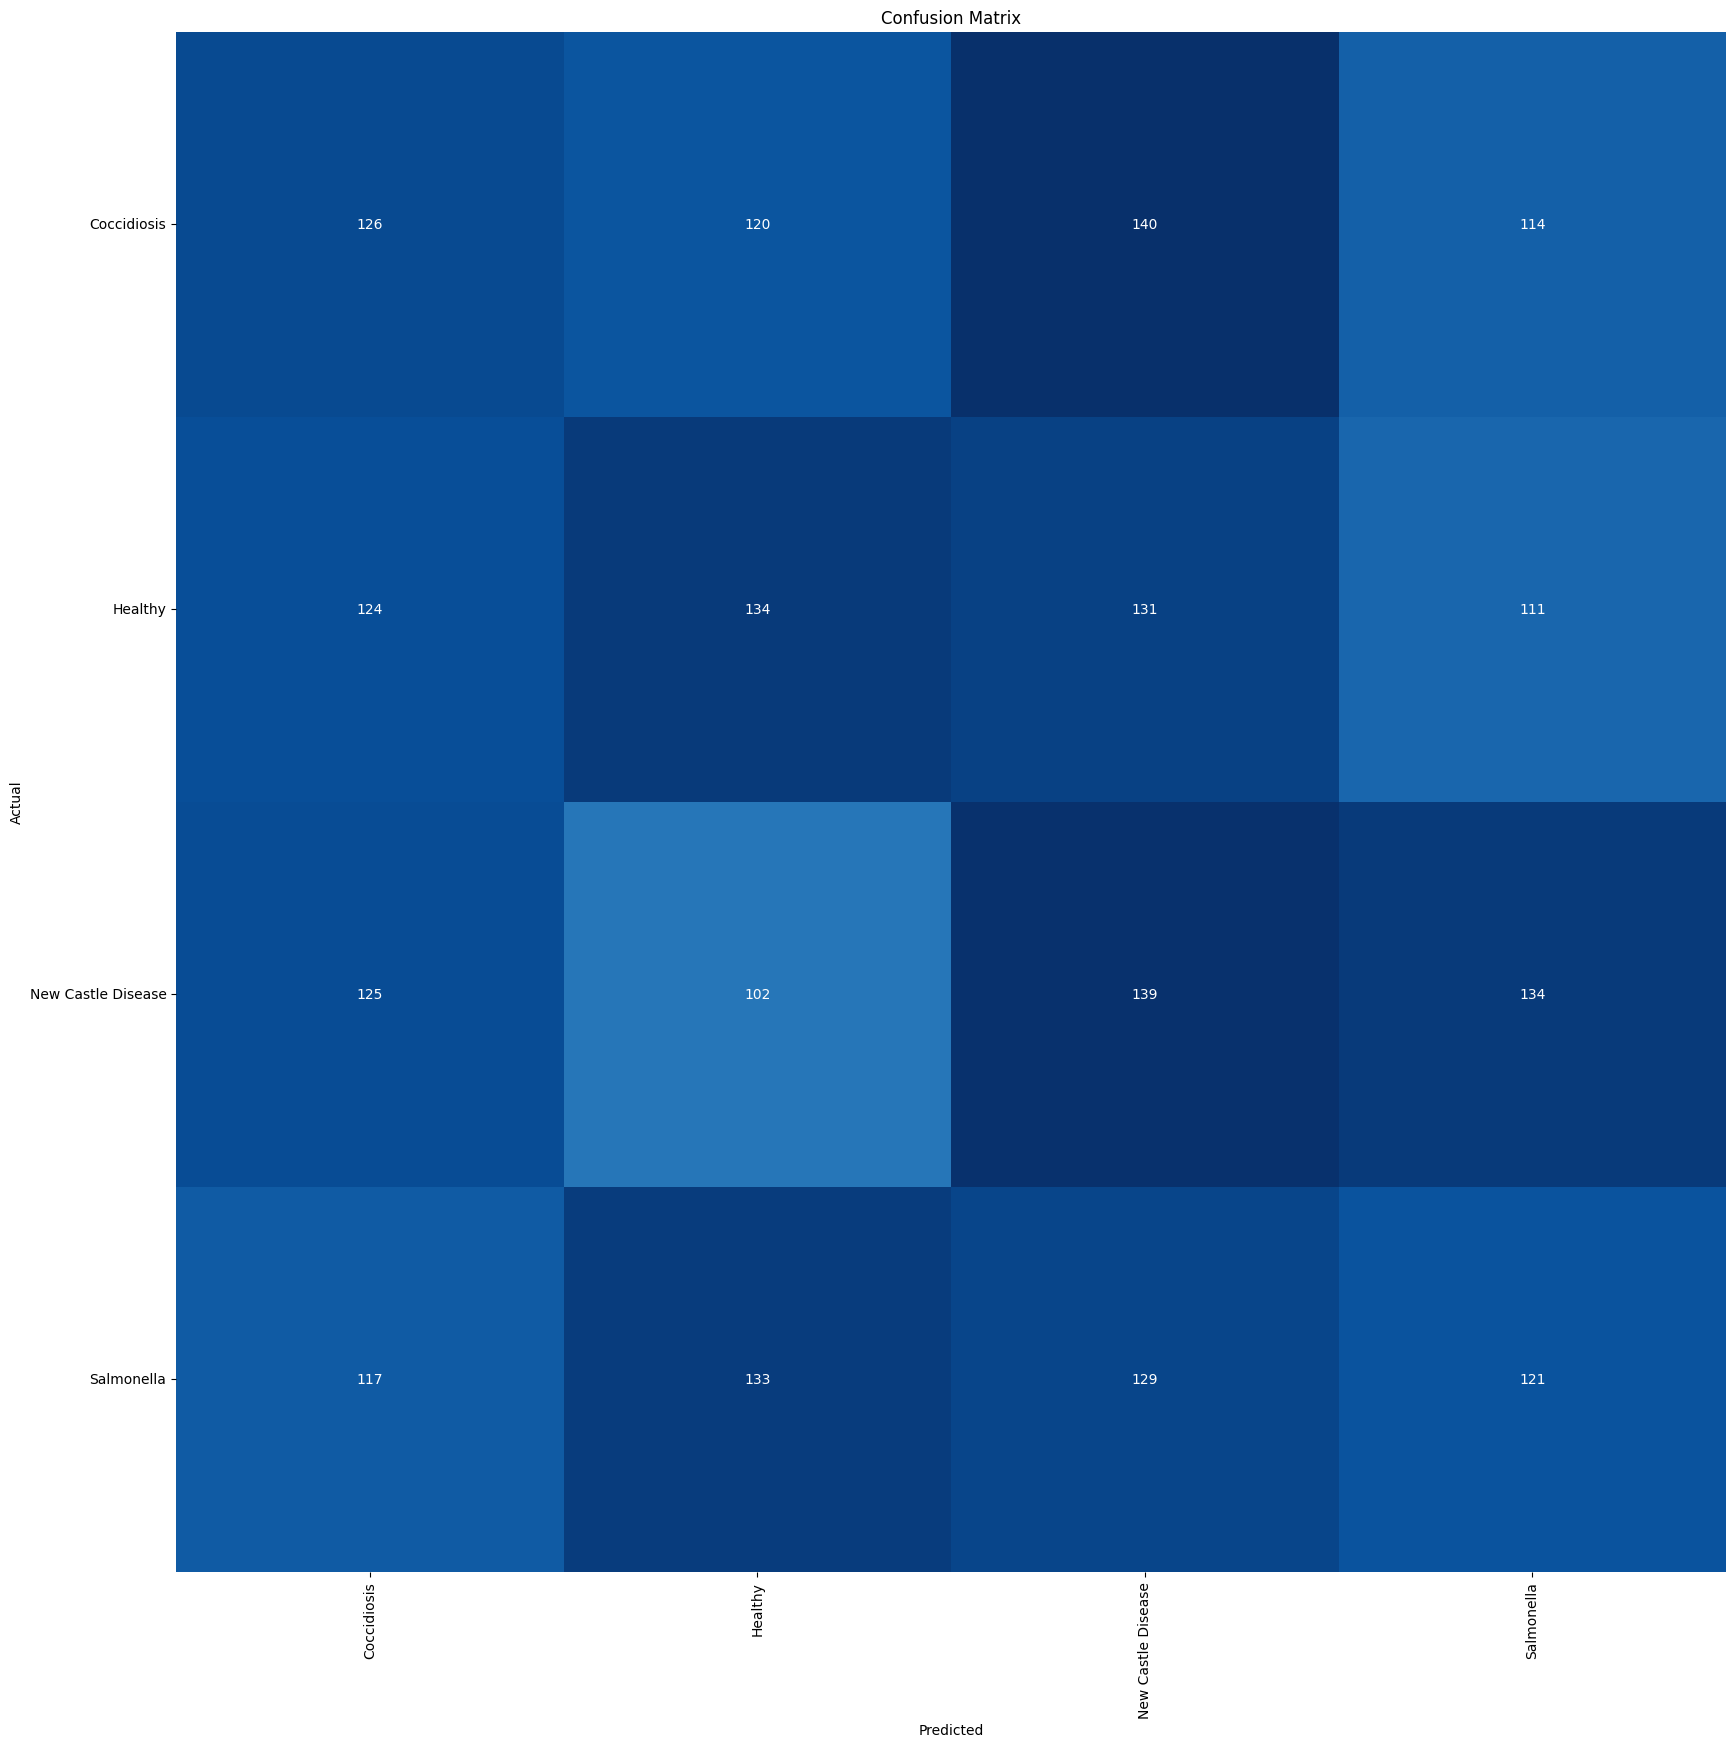

Classification Report:
----------------------
                     precision    recall  f1-score   support

       Coccidiosis     0.2561    0.2520    0.2540       500
           Healthy     0.2740    0.2680    0.2710       500
New Castle Disease     0.2579    0.2780    0.2676       500
        Salmonella     0.2521    0.2420    0.2469       500

          accuracy                         0.2600      2000
         macro avg     0.2600    0.2600    0.2599      2000
      weighted avg     0.2600    0.2600    0.2599      2000



In [ ]:
predictor(model,test_gen)


In [ ]:
from keras.layers import GlobalAveragePooling2D


In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
import kerastuner as kt

<ipython-input-57-5fd8096cdee5>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
# Define the model-building function for Keras Tuner
def build_model(hp):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(hp.Int('units', min_value=512, max_value=2048, step=512), activation='relu')(x)
    predictions = Dense(4, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG', default=1e-3)),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize the tuner
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

# Define early stopping callback
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Run the hyperparameter search
tuner.search(train_gen, epochs=5, validation_data=val_gen, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the optimal hyperparameters
print(f"""
The optimal number of units in the dense layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the final model
history = model.fit(train_gen, validation_data=val_gen, epochs=10)

Trial 23 Complete [00h 01m 08s]
val_accuracy: 0.7080000042915344

Best val_accuracy So Far: 0.7269999980926514
Total elapsed time: 00h 20m 47s

Search: Running Trial #24

Value             |Best Value So Far |Hyperparameter
1024              |1536              |units
0.0011055         |0.00064388        |learning_rate
4                 |10                |tuner/epochs
0                 |4                 |tuner/initial_epoch
1                 |2                 |tuner/bracket
0                 |2                 |tuner/round

Epoch 1/4
63/63 [==============================] - 18s 242ms/step - loss: 1.3883 - accuracy: 0.5490 - val_loss: 0.8485 - val_accuracy: 0.6510


KeyboardInterrupt: 

In [ ]:
train_gen.class_indices.keys()

dict_keys(['Coccidiosis', 'Healthy', 'New Castle Disease', 'Salmonella'])

In [ ]:
labels = ['Coccidiosis', 'Healthy', 'New Castle Disease', 'Salmonella']

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
def get_model_prediction(image_path):
    img = load_img(image_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    predictions = model.predict(x, verbose=0)
    return labels[predictions.argmax()]

In [ ]:
get_model_prediction('/content/data/data/test/Coccidiosis/cocci.0.jpg_aug33.JPG')

'Coccidiosis'

In [ ]:
get_model_prediction('/content/data/data/test/Healthy/healthy.1003.jpg_aug47.JPG')

'Healthy'

In [ ]:
get_model_prediction('/content/data/data/test/New Castle Disease/ncd.1.jpg_aug197.JPG')

'New Castle Disease'

In [ ]:
get_model_prediction('/content/data/data/test/Salmonella/pcrsalmo.111.jpg_aug29.JPG')

'Salmonella'

In [ ]:
get_model_prediction('/content/data/data/test/Salmonella/pcrsalmo.115.jpg_aug28.JPG')

'Salmonella'

In [ ]:
model.save("model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
